In [2]:
import pickle

import argparse as argparse
import numpy as np
import torch
from matplotlib import pyplot as plt
import pickle

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:

def map_dictfill_to_discrete(label_dim, generated_labels_dict, compare_Var):
    y_dims = sum([label_dim[lb] for lb in compare_Var])

    ret= []
    for lb in compare_Var:
        ret.append(generated_labels_dict[lb])

    generated_labels_full = torch.cat(ret, 1).view(-1, y_dims)
    dims_list = [label_dim[lb]for lb in compare_Var]
    generated_labels_full = map_fill_to_discrete(generated_labels_full, dims_list).detach().cpu().numpy().astype(int)

    return generated_labels_full


def map_fill_to_discrete(ara, dims_list):
    each_col = []

    start,end=0,0
    for dim in dims_list:
        end=start+dim
        indices = torch.argmax(ara[:, start: end], dim=1).view(-1,1)  # for each variable
        each_col.append(indices)
        start= end

    result = torch.cat(each_col, 1)
    return result

def plot_image_ara(img_ara):
    rows=img_ara.shape[0]
    cols=img_ara.shape[1]

    print(rows,cols)

    f, axarr = plt.subplots(rows, cols, figsize=(cols, rows))
    for c in range(cols):

        for r in range(rows):
            axarr[r, c].get_xaxis().set_ticks([])
            axarr[r, c].get_yaxis().set_ticks([])

            img= img_ara[r][c].cpu().detach().numpy()
            img= np.transpose(img, (1,2,0))
            axarr[r, c].imshow(img)


        f.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)


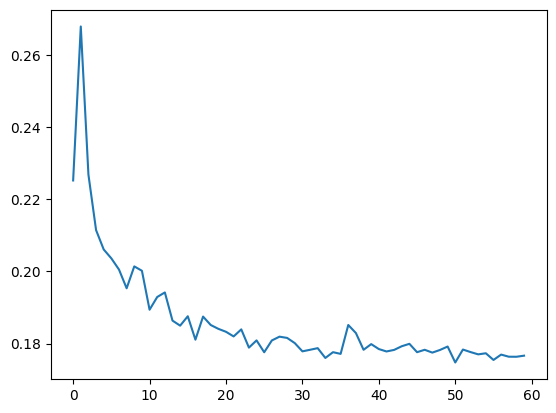

In [4]:
file = f'./SAVED_EXPERIMENTS/ncmFixedTemp/samples/Jointepoch{epoch}.pkl'

with open(file, 'rb') as f:
    data = pickle.load(f)

file = f'./SAVED_EXPERIMENTS/ncmFixedTemp/samples/TVDepoch{epoch}.pkl'

with open(file, 'rb') as f:
    tvd = pickle.load(f)

plt.plot([i for i in range(len(tvd))], tvd)
plt.show()

In [8]:
file = '../napkin_mnist/final_data_Y_doX/final_W2XY.pkl'

with open(file, 'rb') as f:
    sampled_data = pickle.load(f)

13 40


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

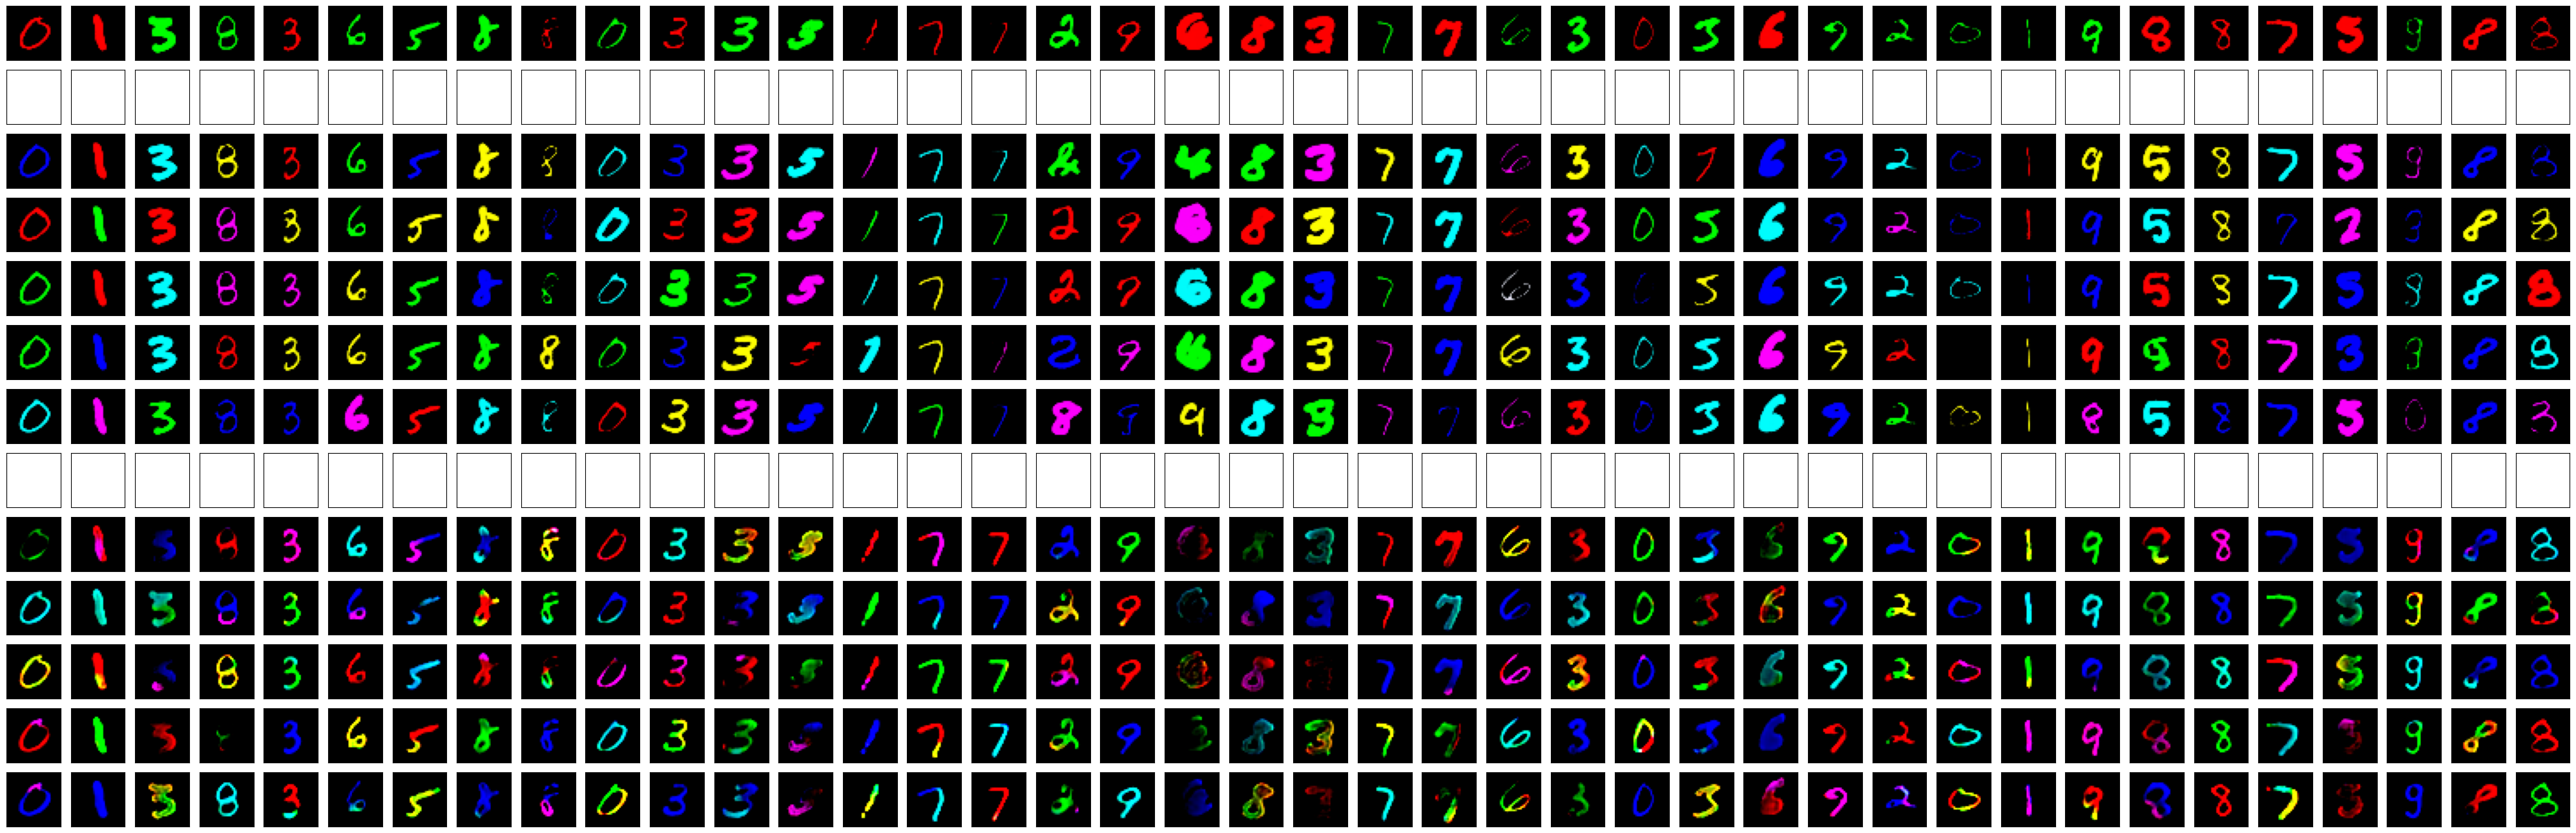

In [41]:
sampled_data.keys()
sampled_data['Y'].shape
S=40

realX = sampled_data['X'][0:S]
white= torch.ones_like(realX.unsqueeze(0))
img_ara= torch.cat([
                    realX.unsqueeze(0),
                    white,
                    sampled_data['Y'][:,0:S],
                    white,
                    fncm_Y.cpu()])
plot_image_ara(img_ara)
# img_ara.shape

# Real data

In [3]:
file = '../napkin_mnist/base_data/napkin_mnist_train.pkl'

with open(file, 'rb') as f:
    real_data = pickle.load(f)

In [4]:
real_data.keys()

dict_keys(['W1', 'X', 'Y', 'U1', 'U2', 'D', 'W1_color', 'W1_thickness', 'W1_digit', 'W2a', 'W2b', 'X_color', 'X_thickness', 'X_digit', 'Y_color', 'Y_thickness', 'Y_digit'])

3 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

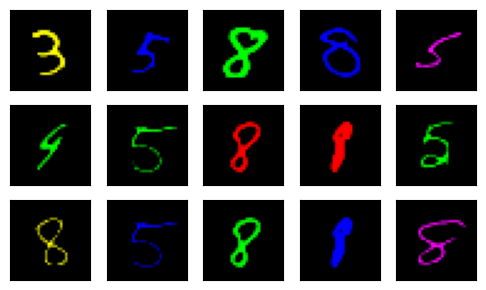

In [39]:
from matplotlib import pyplot as plt

N=5
M=16

randices = torch.randint(real_data['X'].shape[0] , (N,))

img_ara= torch.cat([real_data['W1'][randices].unsqueeze(0),
                    real_data['X'][randices].unsqueeze(0),
                    real_data['Y'][randices].unsqueeze(0)])
plot_image_ara(img_ara)


realX= real_data['X'][randices].to(device)


# Base line: NCM

In [4]:
# Oct 21, 19:00 to Oct 23,  21:00 =50 hours

from ncm_mnist.ModularUtils.Experiment_Class import Experiment
from ncm_mnist.napkin_graph import set_napkin
from ncm_mnist.ModularUtils.ControllerModel import get_generators

file = '/local/scratch/a/rahman89/PycharmProjects/IDDAG/napkin_mnist/baseline_samples/do_X.pkl'
with open(file, 'rb') as f:
    doX = pickle.load(f)


exp_name = 'ncmMNIST'

Exp = Experiment(set_napkin,
                 exp_name=exp_name,
                 Temperature=1,
                 temp_min=0.1,
                 learning_rate=5 * 1e-4,
                 batch_size=200,
                 IMAGE_NOISE_DIM=3,
                 CONF_NOISE_DIM=3,
                 ENCODED_DIM=10,
                 Data_intervs=[{}],
                 num_epochs=301,
                 new_experiment=True
                 )

Exp.load_which_models = ['rW1', 'rX', 'rY']

epoch = 295
gfile = f'./SAVED_EXPERIMENTS/ncmFixedTemp/gen_checkpoints/epoch{epoch}.pth'
checkpoint = torch.load(gfile, map_location="cuda")
label_generators, optimizersMech = get_generators(Exp, Exp.load_which_models)

for label in label_generators:
    label_generators[label].load_state_dict(checkpoint[label + "state_dict"])

curX= doX['X'].to(Exp.DEVICE)
image_noise = torch.randn(curX.shape[0], Exp.IMAGE_NOISE_DIM+ Exp.CONF_NOISE_DIM  ,Exp.IMAGE_SIZE, Exp.IMAGE_SIZE).to(Exp.DEVICE)
input = torch.cat([image_noise, curX], dim=1).to(Exp.DEVICE)
genY= label_generators['Y'](input)




/local/scratch/a/rahman89/PycharmProjects/IDDAG/ncm_mnist/ModularUtils/ControllerConstants.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(m.weight)


In [6]:
with open(f'/local/scratch/a/rahman89/PycharmProjects/IDDAG/napkin_mnist/baseline_samples/ncmYdoX.pkl', 'wb') as pkl_file:
    pickle.dump({'X':doX['X'], 'Y':genY}, pkl_file)

# genY.shape
# M=30
# img1= genY[0:M].unsqueeze(0)
# img2= genY[100:100+M].unsqueeze(0)
# plot_image_ara(torch.cat([img1, img2]))

# ID-DAG

# Image to digit

In [12]:
import os
from napkin_mnist.train_classifiers import ConvNet


def load_models(save_dir, save_name):
    """ Loads all the models """
    checkpoint = torch.load(os.path.join(save_dir, save_name), map_location='cpu')

    output = {}
    for k, v in checkpoint.items():
        if k.endswith('digit'):
            output[k] = ConvNet(10)
            output[k].load_state_dict(v)
        elif k.endswith('thickness'):
            output[k] = ConvNet(3)
            output[k].load_state_dict(v)
        elif k.endswith('color'):
            output[k] = ConvNet(8)
            output[k].load_state_dict(v)


    return output


save_dir ="../napkin_mnist/SAVED_EXPERIMENTS"
save_name="napkin_classifiers"
classifiers = load_models(save_dir, save_name)